# 02 Pages with SRI

In [1]:
import re
import datetime
from glob import iglob
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.shell import sqlContext

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.3
      /_/

Using Python version 3.7.3 (default, Mar 27 2019 09:23:15)
SparkSession available as 'spark'.


## Load the data

In [2]:
def loadData(path):
    frames = []
    for file in iglob(path, recursive=True):
        crawl = re.findall(r'/(\d{4}-\d{2})/', file)
        date = datetime.datetime.strptime(crawl[0] + "-1", "%Y-%W-%w")
        frame = sqlContext.read.parquet(file).toPandas()
        frame['date'] = date
        frames.append(frame)
    return pd.concat(frames, ignore_index=True).set_index('date').sort_index()

In [3]:
data = loadData('../data/sri/*/reports/02_pages_with_sri/')
script = loadData('../data/sri/*/reports/02_pages_with_sri_script/')
link = loadData('../data/sri/*/reports/02_pages_with_sri_link/')
top1m = loadData('../data/sri/*/reports/02_pages_with_sri_top1m/')
top1k = loadData('../data/sri/*/reports/02_pages_with_sri_top1k/')

In [4]:
data

,number,total,percentage
date,,,
2016-05-02,1185678,1337194450,0.09
2017-02-27,20774415,3084165319,0.67
2017-08-21,24854789,3280080910,0.76
2018-02-26,38565498,3488463319,1.11
2018-08-20,56356748,2686323358,2.10
2019-03-04,74357335,2913733422,2.55


## Plot the data

### SRI release

23 June 2016

https://www.w3.org/TR/SRI/

/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


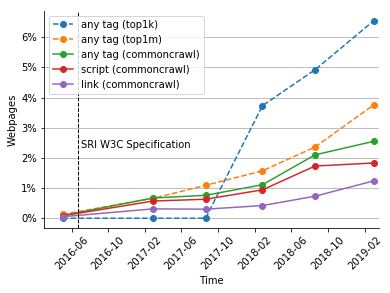

In [4]:
plot, ax = plt.subplots(1, 1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid()

plt.plot(top1k.index, top1k['percentage'], label='any tag (top1k)', marker='o', linestyle='--')
plt.plot(top1m.index, top1m['percentage'], label='any tag (top1m)', marker='o', linestyle='--')

plt.plot(data.index, data['percentage'], label='any tag (commoncrawl)', marker='o')
plt.plot(script.index, script['percentage'], label='script (commoncrawl)', marker='o')
plt.plot(link.index, link['percentage'], label='link (commoncrawl)', marker='o')

plt.text(datetime.date(2016, 6, 23) + datetime.timedelta(days=10), 2.32, "SRI W3C Specification")
plt.axvline(x=datetime.date(2016, 6, 23), color='k', linestyle='--', linewidth=1)

ax.set_yticklabels(['{:,.0%}'.format(x / 100) for x in ax.get_yticks()])

plt.xticks(rotation=45)
plt.xlabel('Time')
plt.xlim(datetime.date(2016, 3, 1), datetime.date(2019, 3, 20))
plt.ylabel('Webpages')
plt.legend(loc='upper left')
plt.savefig('02_pages_with_sri.pdf', bbox_inches = 'tight')

In [5]:
out = open("02_pages_with_sri.tex", 'w')
    
lastCrawl = data.reset_index()[-1:]
out.write("\def\\CCUrlSriN{\\num{" + ("%0.2f" % lastCrawl['number']) + "}}\n")
out.write("\def\\CCUrlSriP{\\num{" + ("%0.2f" % lastCrawl['percentage']) + "}\%}\n")

out.close()
